# Dental Image Analysis : Tooth disease detection


### Load Initial Data

In [ ]:
!unzip teeth_dataset_f.zip

### Import Libraries

In [ ]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise
from keras.models import load_model
from keras.preprocessing import image
import image as pil_image
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')
#importing tensorflow
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import Model, Sequential

##Manipulate a image from Dataset

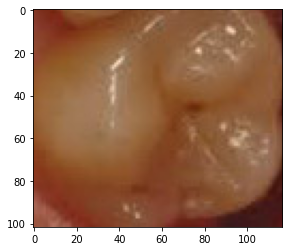

In [ ]:
img= cv2.imread(r"teeth_dataset_f/training/caries/wc10.jpg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

### Gray Image

(102, 117)


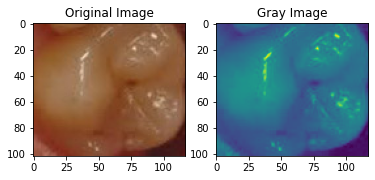

In [ ]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gray Image")
plt.show()

In [ ]:
img= cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

### Flipeped Image

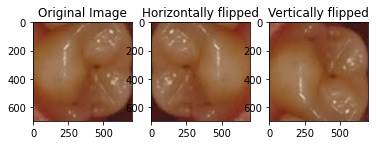

In [ ]:
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

### Rotate Image

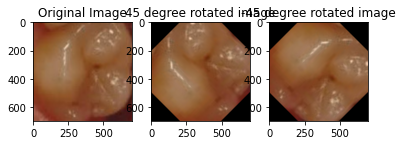

In [ ]:
r_image = rotate(img, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-45) #angle value is negative for clockwise rotation
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

### Wrap Image

affine transformation is a functional mapping between two geometric (affine) spaces which preserve points, straight and parallel lines as well as ratios between points.

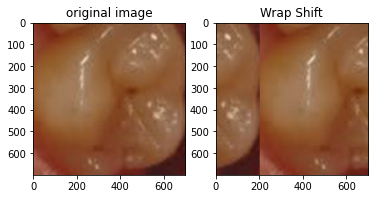

In [ ]:
transform = AffineTransform(translation=(-200,0))
warp_image = warp(img,transform, mode="wrap")
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)

## Add Noise to Image
Image noise is random variation of brightness or color information in images.

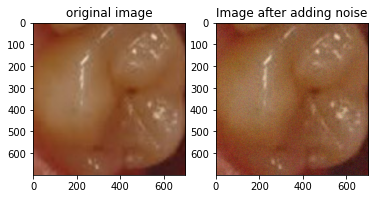

In [ ]:
noisy_image= random_noise(img)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

###Blury Image :Using GaussianBlur

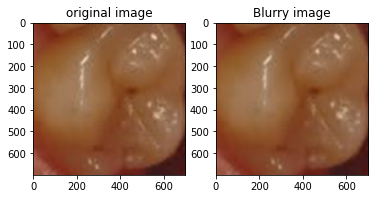

In [ ]:
blur_image= cv2.GaussianBlur(img, (11,11),0)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)

## Define functions for each operation

In [ ]:
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

 We use dictionary to store names of functions

In [ ]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                   'warp shift': warp_shift,
                   'adding noise': add_noise,
                   'blurring image':blur_image
                 }

## Data augmentation

In [ ]:
#images_path="teeth_dataset_f/training/without_caries/" #path to original images
images_path="teeth_dataset_f/training/caries/" #path to original images
#augmented_path="teeth_dataset_f/training/without_caries/" # path to store aumented images
augmented_path="teeth_dataset_f/training/caries/" # path to store aumented images
images=[] # to store paths of images from folder

In [ ]:
for im in os.listdir(images_path):  # read image name from folder and append its path into array     
    images.append(os.path.join(images_path,im))

images_to_generate=456  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1

In [ ]:
!zip -r "teeth_dataset_final.zip" "teeth_dataset"

## Height and widths of the dataset

In [ ]:
list_of_heights = []
list_of_widths = []
dir_path = "teeth_dataset_f/training/"
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # Dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

In [ ]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  caries  category is  445
No of Images in  without_caries  category is  65


##Plotting 

Text(0.5, 1.0, 'heights')

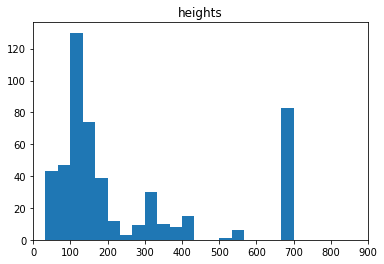

In [ ]:
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0.0, 900.0)

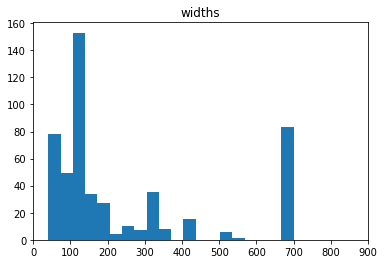

In [ ]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

##Model

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3),kernel_regularizer=regularizers.l1(0.0001),activation="relu",input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2)))
model.add(BatchNormalization())   

model.add(Conv2D(filters=64, kernel_size = (3,3),kernel_regularizer=regularizers.l1(0.0001), activation="relu"))

model.add(Conv2D(filters=64,kernel_size = (3,3), kernel_regularizer=regularizers.l1(0.0001),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=128,kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(BatchNormalization()) 

model.add(Dense(30,activation="relu"))  
#model.add(Dense(2,activation="softmax"))
model.add(Dense(1))
model.add(Activation('sigmoid'))
  
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

##Summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 35, 35, 64)       

In [ ]:
image_shape=(150, 150, 3)
#Using to ImageDataGenerator to rescale image 
image_gen = ImageDataGenerator(rescale=1/255)
train_image_gen=image_gen.flow_from_directory('teeth_dataset_f/training',
                                             target_size=image_shape[:2],
                                             batch_size=5,
                                             class_mode='binary')#Because We have Cavity and no cavity


test_image_gen=image_gen.flow_from_directory('teeth_dataset_f/test',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary',
                                             seed=123#To help Visualize the results
                                             )

Found 510 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


## Fit The model

In [ ]:
history =model.fit(train_image_gen,
                   epochs=40,)

Epoch 1/40
102/102 [==============================] - 35s 330ms/step - loss: 0.6810 - accuracy: 0.8064
Epoch 2/40
102/102 [==============================] - 34s 329ms/step - loss: 0.4197 - accuracy: 0.9131
Epoch 3/40
102/102 [==============================] - 34s 330ms/step - loss: 0.3918 - accuracy: 0.9431
Epoch 4/40
102/102 [==============================] - 34s 331ms/step - loss: 0.3806 - accuracy: 0.9525
Epoch 5/40
102/102 [==============================] - 34s 332ms/step - loss: 0.3997 - accuracy: 0.9401
Epoch 6/40
102/102 [==============================] - 34s 329ms/step - loss: 0.3903 - accuracy: 0.9384
Epoch 7/40
102/102 [==============================] - 33s 328ms/step - loss: 0.3694 - accuracy: 0.9360
Epoch 8/40
102/102 [==============================] - 34s 329ms/step - loss: 0.3420 - accuracy: 0.9515
Epoch 9/40
102/102 [==============================] - 33s 328ms/step - loss: 0.3841 - accuracy: 0.9431
Epoch 10/40
102/102 [==============================] - 33s 327ms/step - l

In [ ]:
model.evaluate(test_image_gen)

14/14 [==============================] - 1s 22ms/step - loss: 0.1903 - accuracy: 1.0000


[0.1903029829263687, 1.0]

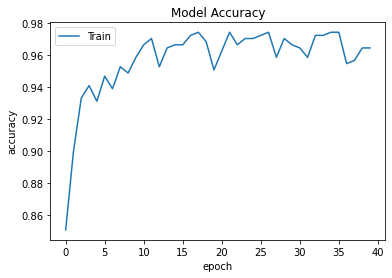

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

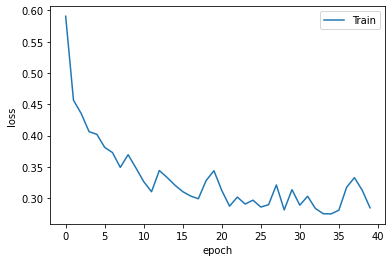

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

cavity infected tooth


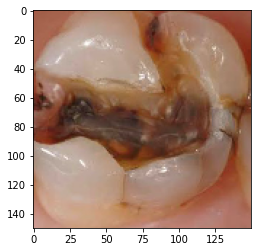

cavity infected tooth


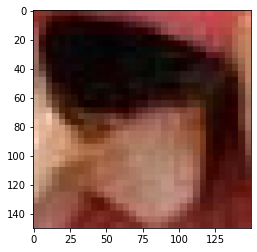

Healthy tooth


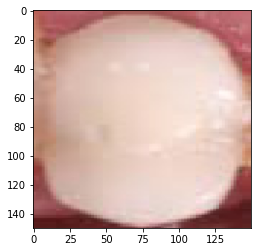

cavity infected tooth


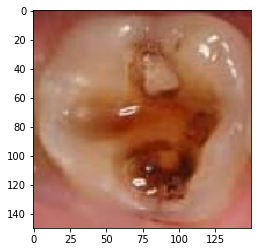

cavity infected tooth


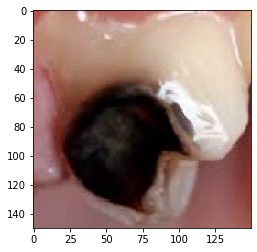

cavity infected tooth


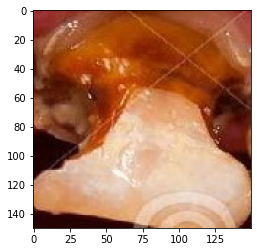

cavity infected tooth


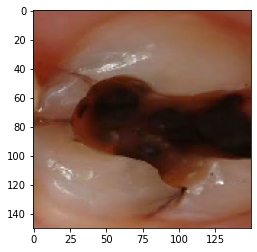

Healthy tooth


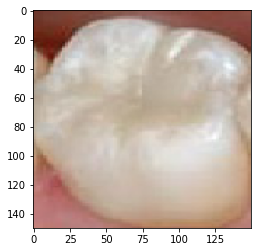

cavity infected tooth


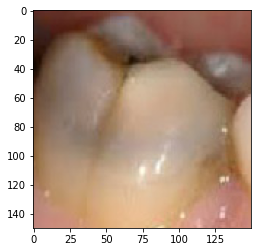

Healthy tooth


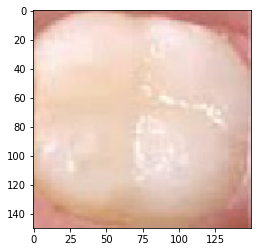

cavity infected tooth


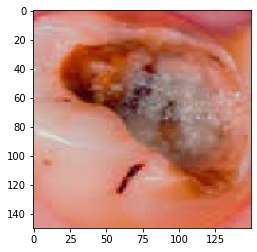

cavity infected tooth


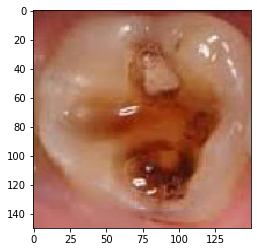

cavity infected tooth


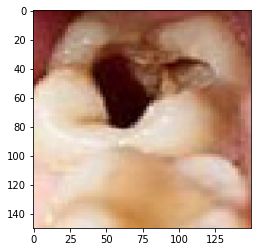

Healthy tooth


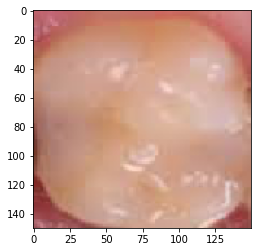

In [ ]:
for _ in range(14):
    img, label = test_image_gen.next()
    prediction =model.predict_classes(img)
    if prediction[0][0]==0:
        print("cavity infected tooth")
    else:
      print("Healthy tooth")
    plt.imshow(img[0])
    plt.show()